In [72]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from factor_analyzer import FactorAnalyzer

from sklearn.metrics import silhouette_samples, silhouette_score

In [73]:
ibm_data = pd.read_csv('../data/merged_data.csv')
ibm_data.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Satisfaction Score,Customer Status,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,Male,78,No,Yes,No,No,0,3,Churned,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,3,Churned,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,2,Churned,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,2,Churned,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,2,Churned,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


In [74]:
print('Number of rows:', ibm_data.shape[0], ' Number of features:', ibm_data.shape[1])

Number of rows: 7043  Number of features: 42


In [75]:
ibm_data.describe()

,Age,Number of Dependents,Satisfaction Score,Churn Value,Churn Score,CLTV,Number of Referrals,Tenure Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,3.244924,0.265370,58.505040,4400.295755,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1.201657,0.441561,21.170031,1183.057152,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,1.000000,0.000000,5.000000,2003.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,3.000000,0.000000,40.000000,3469.000000,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,3.000000,0.000000,61.000000,4527.000000,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,4.000000,1.000000,75.500000,5380.500000,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,5.000000,1.000000,96.000000,6500.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [76]:
ibm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Satisfaction Score                 7043 non-null   int64  
 9   Customer Status                    7043 non-null   object 
 10  Churn Value                        7043 non-null   int64  
 11  Churn Score                        7043 non-null   int64

In [77]:
print(ibm_data.columns.tolist())

['Customer ID', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Number of Dependents', 'Satisfaction Score', 'Customer Status', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason', 'Referred a Friend', 'Number of Referrals', 'Tenure Months', 'Offer', 'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Avg Monthly GB Download', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']


# EDA of dataset

In [78]:
ibm_data = ibm_data[ibm_data['Customer Status'] != 'Joined']
ibm_data['Customer Status'].unique()

array(['Churned', 'Stayed'], dtype=object)

## Visualising Churn Occurances

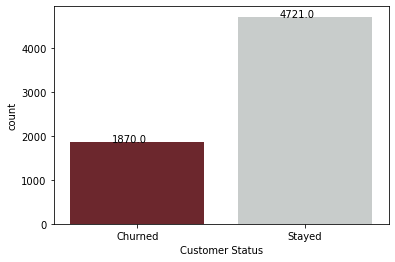

In [81]:
colors = ["#781B24","#C7CDCB"]
sns.set_palette(sns.color_palette(colors))
ax = sns.countplot(data = ibm_data, x='Customer Status')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()+1), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

## Demographic Variables vs Churn

Gender


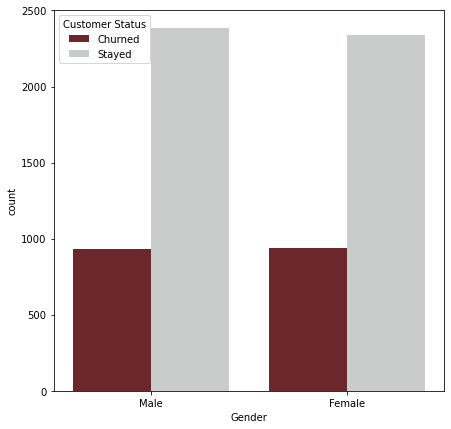

Senior Citizen


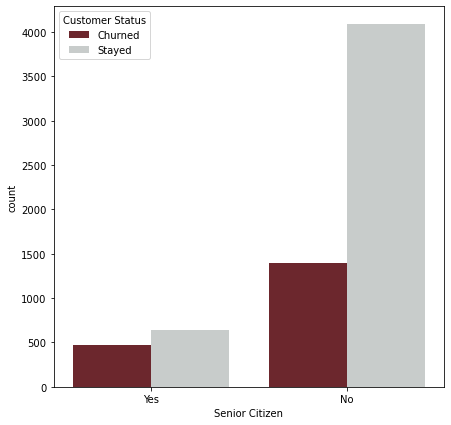

Dependents


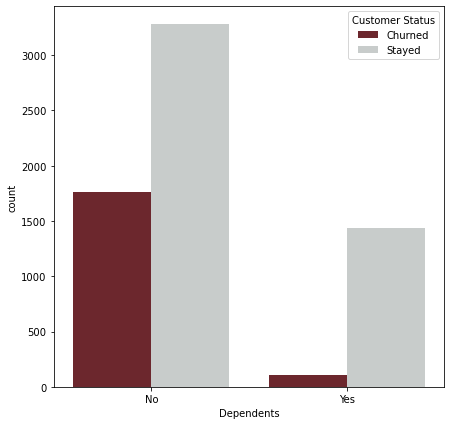

Married


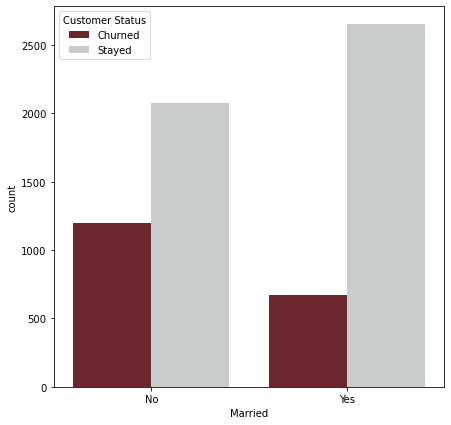

Under 30


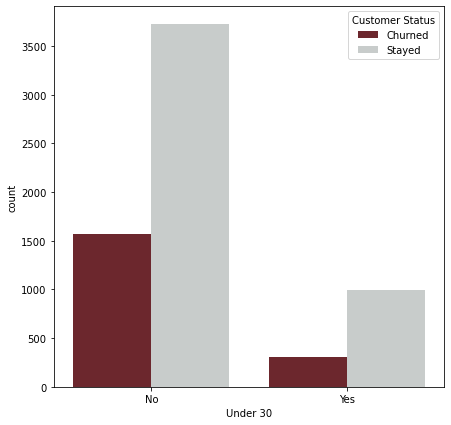

In [82]:
colors = ["#781B24","#C7CDCB"]
sns.set_palette(sns.color_palette(colors))
# Define the list of demographic features
demographic_features = ['Gender', 'Senior Citizen', 'Dependents', 'Married', 'Under 30']

# Loop over the demographic features
for feature in demographic_features:
    # Print the name of the feature
    print(feature)
    
    # Create a figure and a countplot
    fig, ax = plt.subplots(figsize=(7, 7))
    sns.countplot(x=ibm_data[feature], hue=ibm_data["Customer Status"], ax=ax)
    
    # Show the plot
    plt.show()

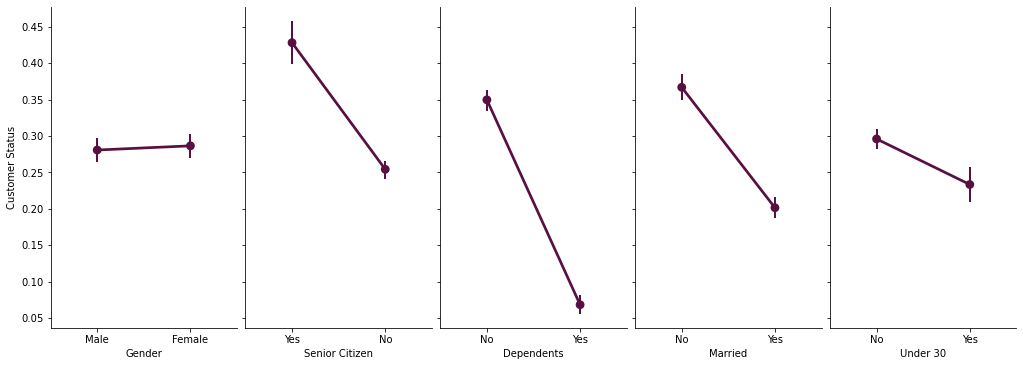

In [13]:
df2 =ibm_data.copy()
# Map "Stayed" to 0 and "Churned" to 1 in the "Customer Status" column
df2["Customer Status"] = df2["Customer Status"].map({"Stayed": 0, "Churned": 1})

# Create a PairGrid plot with the desired variables
variables = ['Gender', 'Senior Citizen', 'Dependents', 'Married', 'Under 30']
g = sns.PairGrid(data=df2, y_vars='Customer Status', x_vars=variables, height=7, aspect=1)

# Plot pointplots for each variable on the PairGrid
g.map(sns.pointplot, scale=1, errwidth=2, color='xkcd:plum')

# Set the figure size
g.fig.set_size_inches(14, 5)

# Show the plot
plt.show()

## Tenure vs Churn

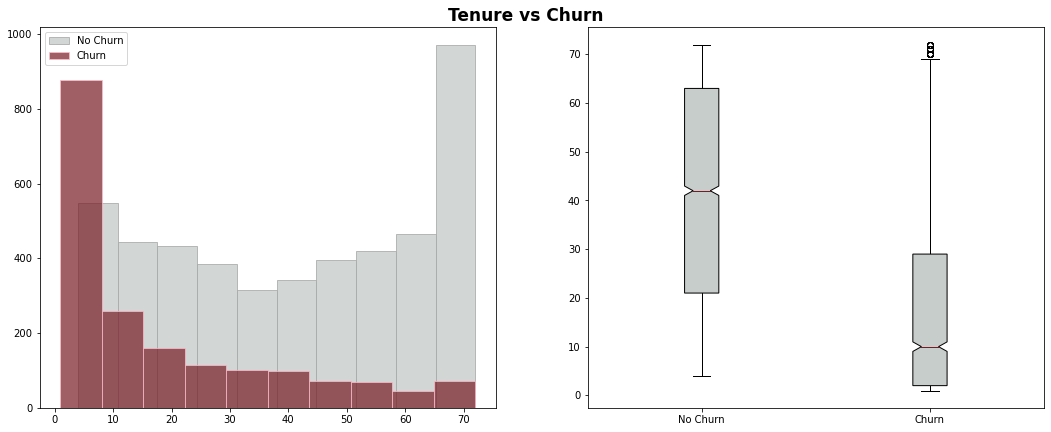

In [84]:
colors = ["#C7CDCB","#781B24"]
sns.set_palette(sns.color_palette(colors))
# Split data into churn and no churn dataframes
churn = df2[df2["Customer Status"] == 1]
no_churn = df2[df2["Customer Status"] == 0]

# Create a figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(18, 7))

# Plot histogram of tenure for no churn customers
axs[0].hist(no_churn['Tenure Months'], label='No Churn', alpha=.8, edgecolor='darkgrey')

# Plot histogram of tenure for churn customers on the same subplot
axs[0].hist(churn['Tenure Months'], label='Churn', alpha=0.7, edgecolor='pink')

# Add legend to the first subplot
axs[0].legend()

# Create a list of columns to use in the boxplot
columns = [no_churn['Tenure Months'], churn['Tenure Months']]

# Create a boxplot on the second subplot
axs[1].boxplot(columns, notch=True, patch_artist=True)

# Set the x-axis ticks and labels
axs[1].set_xticks([1, 2])
axs[1].set_xticklabels(["No Churn", "Churn"])

# Add a title to the figure
fig.suptitle('Tenure vs Churn', fontsize=17, fontweight='bold', y=0.92)

# Show the figure
plt.show()

## Type of Contracts vs Churn

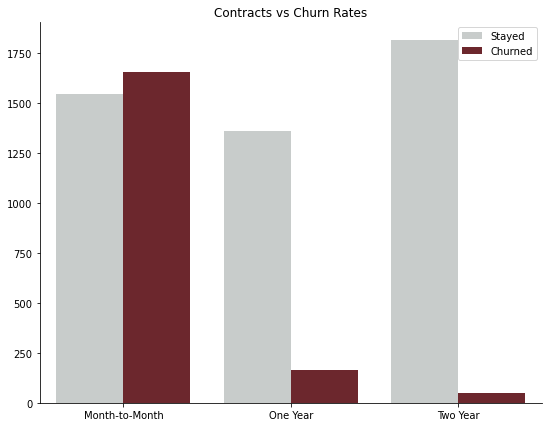

In [86]:
# Set the figure size
plt.figure(figsize=(9, 7))

# Create a count plot with Contract on the x-axis and Churn on the hue axis
sns.countplot(x="Contract", hue="Customer Status", data=df2)

# Set the plot title
plt.title('Contracts vs Churn Rates')

# Set the x and y axis labels to None
plt.xlabel(None)
plt.ylabel(None)

# Remove the top and right spines from the plot
sns.despine()

# Set the legend labels and location
plt.legend(title='', loc='upper right', labels=['Stayed', 'Churned'])

# Show the plot
plt.show()

## Charges vs Churn

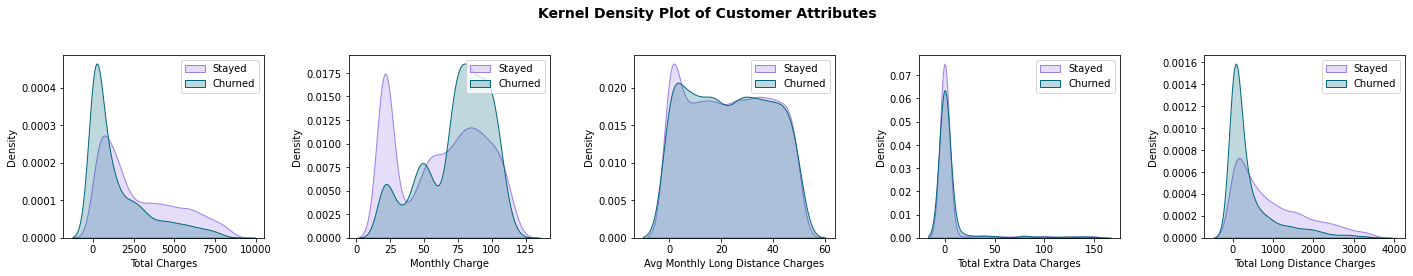

In [87]:
# Define the list of columns to plot
df2['Total Charges'] = pd.to_numeric(df2['Total Charges'], errors='coerce')
df2['Monthly Charge'] = pd.to_numeric(df2['Monthly Charge'], errors='coerce')
df2['Avg Monthly Long Distance Charges'] = pd.to_numeric(df2['Avg Monthly Long Distance Charges'], errors='coerce')
df2['Total Extra Data Charges'] = pd.to_numeric(df2['Total Extra Data Charges'], errors='coerce')
df2['Total Long Distance Charges'] = pd.to_numeric(df2['Total Long Distance Charges'], errors='coerce')


columns = ['Total Charges', 'Monthly Charge', 'Avg Monthly Long Distance Charges',
           'Total Extra Data Charges', 'Total Long Distance Charges']

# Split data into churn and no churn dataframes
churn = df2[df2['Customer Status'] == 1]
no_churn = df2[df2['Customer Status'] == 0]

# Create the subplots
fig, axs = plt.subplots(1, len(columns), figsize=(20, 4))

# Loop through each column and plot the kernel density plot for churn and no churn dataframes
for i, col in enumerate(columns):
    ax = axs[i]
    ax = sns.kdeplot(no_churn[col], color='#9C7FE8', shade=True, ax=ax)
    ax = sns.kdeplot(churn[col], color='#00677C', shade=True, ax=ax)
    ax.set_xlabel(col)
    ax.legend(['Stayed', 'Churned'], loc='upper right')

# Add a title to the plot
fig.suptitle('Kernel Density Plot of Customer Attributes', fontsize=14, fontweight='bold')

# Adjust the spacing between subplots
fig.tight_layout(pad=2)

# Show the plot
plt.show()

## Additional Services across each segment

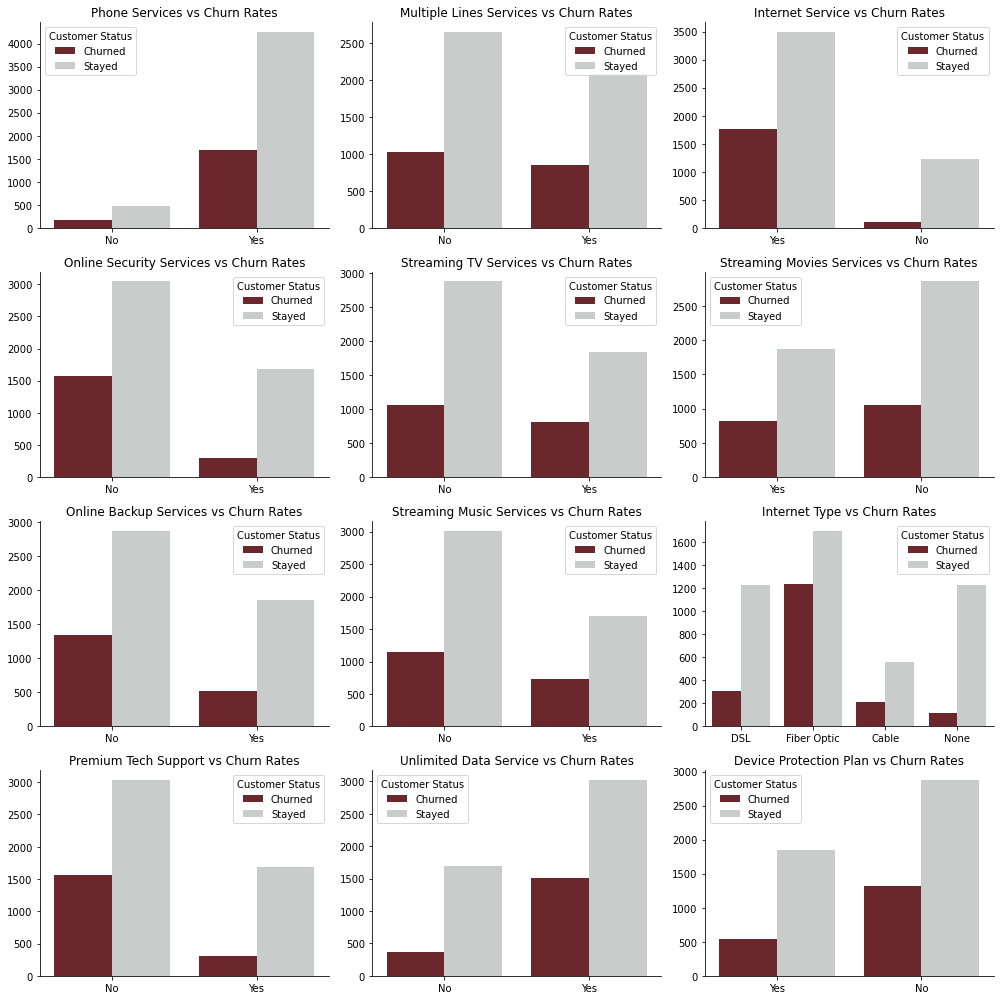

In [88]:
# Define the plot dimensions and the colors for churn and no churn customers
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14,14))
colors = ["#781B24","#C7CDCB"]
sns.set_palette(sns.color_palette(colors))

# Define the plot titles and axis labels
titles = ["Phone Services vs Churn Rates", "Multiple Lines Services vs Churn Rates", "Internet Service vs Churn Rates",
          "Online Security Services vs Churn Rates", 
           "Streaming TV Services vs Churn Rates",
          "Streaming Movies Services vs Churn Rates", "Online Backup Services vs Churn Rates", "Streaming Music Services vs Churn Rates", "Internet Type vs Churn Rates", "Premium Tech Support vs Churn Rates", "Unlimited Data Service vs Churn Rates", "Device Protection Plan vs Churn Rates"]

# Define the columns to use in each subplot
columns = ["Phone Service", "Multiple Lines", "Internet Service", "Online Security", 
            "Streaming TV", "Streaming Movies", "Online Backup","Streaming Music","Internet Type", "Premium Tech Support"
, "Unlimited Data","Device Protection Plan"]

# Plot each subplot
for i in range(len(columns)):
    sns.countplot(x=columns[i], hue="Customer Status", data=ibm_data, ax=axes[i//3, i%3]).set(title=titles[i], xlabel=None, ylabel=None)

# Remove the spines from the subplots and adjust the layout
sns.despine()
plt.tight_layout()

# Show the plot
plt.show()

## Other 'Score' variables vs Churn

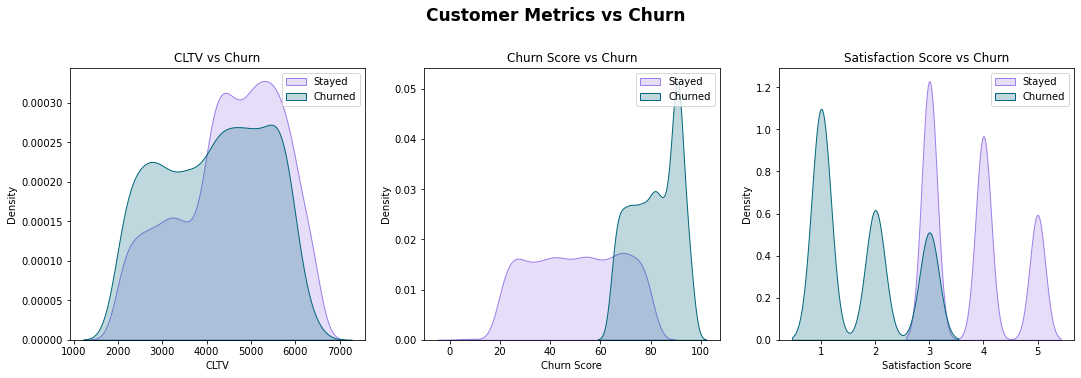

In [19]:
# Convert CLTV, Churn Score, and Satisfaction Score to numeric for both churn and no churn dataframes
df2['CLTV'] = pd.to_numeric(df2['CLTV'], errors='coerce')
df2['Churn Score'] = pd.to_numeric(df2['Churn Score'], errors='coerce')
df2['Satisfaction Score'] = pd.to_numeric(df2['Satisfaction Score'], errors='coerce')

# Split data into churn and no churn dataframes
churn = df2[df2['Customer Status'] == 1]
no_churn = df2[df2['Customer Status'] == 0]

# Create a figure with 3 subplots
fig, axs = plt.subplots(ncols=3, figsize=(18, 5))

# Create a kernel density plot of CLTV for churn and no churn dataframes on the first subplot
ax = sns.kdeplot(data=no_churn, x='CLTV', color='#9C7FE8', shade=True, ax=axs[0])
ax = sns.kdeplot(data=churn, x='CLTV', color='#00677C', shade=True, ax=axs[0])
ax.legend(['Stayed', 'Churned'], loc='upper right')
ax.set_title('CLTV vs Churn')

# Create a kernel density plot of Churn Score for churn and no churn dataframes on the second subplot
ax = sns.kdeplot(data=no_churn, x='Churn Score', color='#9C7FE8', shade=True, ax=axs[1])
ax = sns.kdeplot(data=churn, x='Churn Score', color='#00677C', shade=True, ax=axs[1])
ax.legend(['Stayed', 'Churned'], loc='upper right')
ax.set_title('Churn Score vs Churn')

# Create a kernel density plot of Satisfaction Score for churn and no churn dataframes on the third subplot
ax = sns.kdeplot(data=no_churn, x='Satisfaction Score', color='#9C7FE8', shade=True, ax=axs[2])
ax = sns.kdeplot(data=churn, x='Satisfaction Score', color='#00677C', shade=True, ax=axs[2])
ax.legend(['Stayed', 'Churned'], loc='upper right')
ax.set_title('Satisfaction Score vs Churn')

# Add a title to the figure
fig.suptitle('Customer Metrics vs Churn', fontsize=17, fontweight='bold', y=1.05)

# Show the figure
plt.show()

# Preprocessing Data for Clustering

In [20]:
# Check for columns that have null values
ibm_data.columns[ibm_data.isnull().any()]

Index(['Churn Category', 'Churn Reason'], dtype='object')

In [21]:
# Drop Churn Reason and Churn Category Columns
df = ibm_data.copy()
df.drop(['Churn Reason', 'Churn Category'], axis = 1, inplace= True)
df.columns[df.isnull().any()]

Index([], dtype='object')

In [22]:
# Extract Categorical Column Names
cat_cols = df.select_dtypes(include=['object']).columns
print(cat_cols.tolist())
print(len(cat_cols))

['Customer ID', 'Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Customer Status', 'Referred a Friend', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method']
24


In [23]:
# Display Categorical Features' unique values
for i in cat_cols:
  print(i, df[i].unique(),'\n|')

Customer ID ['8779-QRDMV' '7495-OOKFY' '1658-BYGOY' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK'] 
|
Gender ['Male' 'Female'] 
|
Under 30 ['No' 'Yes'] 
|
Senior Citizen ['Yes' 'No'] 
|
Married ['No' 'Yes'] 
|
Dependents ['No' 'Yes'] 
|
Customer Status ['Churned' 'Stayed'] 
|
Referred a Friend ['No' 'Yes'] 
|
Offer ['None' 'Offer E' 'Offer D' 'Offer C' 'Offer B' 'Offer A'] 
|
Phone Service ['No' 'Yes'] 
|
Multiple Lines ['No' 'Yes'] 
|
Internet Service ['Yes' 'No'] 
|
Internet Type ['DSL' 'Fiber Optic' 'Cable' 'None'] 
|
Online Security ['No' 'Yes'] 
|
Online Backup ['No' 'Yes'] 
|
Device Protection Plan ['Yes' 'No'] 
|
Premium Tech Support ['No' 'Yes'] 
|
Streaming TV ['No' 'Yes'] 
|
Streaming Movies ['Yes' 'No'] 
|
Streaming Music ['No' 'Yes'] 
|
Unlimited Data ['No' 'Yes'] 
|
Contract ['Month-to-Month' 'One Year' 'Two Year'] 
|
Paperless Billing ['Yes' 'No'] 
|
Payment Method ['Bank Withdrawal' 'Credit Card' 'Mailed Check'] 
|


In [24]:
# Cast Total Charges to Float
# temp = df[df['Total Charges'].str.strip() != '']
# tc_median = temp['Total Charges'].median()
# df['Total Charges'] = df['Total Charges'].apply(lambda x: tc_median if str(x).strip() == '' else x)
df['Total Charges'] = df['Total Charges'].astype(float)

In [25]:
df.drop(['Customer ID'], axis=1, inplace=True)

In [26]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

['Total Revenue']

In [27]:
corr_matrix

,Age,Number of Dependents,Satisfaction Score,Churn Value,Churn Score,CLTV,Number of Referrals,Tenure Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
Age,1.000000,0.125500,0.081522,0.111174,0.079426,0.006356,0.032019,0.009574,0.009553,0.389419,0.135063,0.047788,0.020570,0.021759,0.009976,0.035080
Number of Dependents,0.125500,1.000000,0.171321,0.232525,0.173456,0.047656,0.276880,0.107311,0.009199,0.129411,0.142902,0.016118,0.012211,0.015797,0.065869,0.032315
Satisfaction Score,0.081522,0.171321,1.000000,0.759986,0.502933,0.098114,0.215047,0.286182,0.003179,0.087228,0.206308,0.116581,0.035134,0.004571,0.181206,0.146577
Churn Value,0.111174,0.232525,0.759986,1.000000,0.669474,0.145513,0.312118,0.433759,0.006647,0.040061,0.172815,0.250071,0.043525,0.000259,0.268430,0.278626
Churn Score,0.079426,0.173456,0.502933,0.669474,1.000000,0.092242,0.224622,0.289747,0.020900,0.016348,0.118557,0.165713,0.021249,0.003485,0.172340,0.182967
CLTV,0.006356,0.047656,0.098114,0.145513,0.092242,1.000000,0.119095,0.409520,0.025458,0.015816,0.092737,0.347398,0.003834,0.040994,0.283451,0.360842
Number of Referrals,0.032019,0.276880,0.215047,0.312118,0.224622,0.119095,1.000000,0.323826,0.003205,0.034329,0.012224,0.241943,0.020372,0.002547,0.207028,0.253851
Tenure Months,0.009574,0.107311,0.286182,0.433759,0.289747,0.409520,0.323826,1.000000,0.011992,0.029280,0.205105,0.812795,0.042729,0.071224,0.653170,0.840935
Avg Monthly Long Distance Charges,0.009553,0.009199,0.003179,0.006647,0.020900,0.025458,0.003205,0.011992,1.000000,0.034002,0.140487,0.071022,0.018207,0.002204,0.630419,0.244986
Avg Monthly GB Download,0.389419,0.129411,0.087228,0.040061,0.016348,0.015816,0.034329,0.029280,0.034002,1.000000,0.382200,0.219765,0.001054,0.085240,0.003887,0.174023


In [28]:
# drop zip code
# df.drop(['Zip Code', 'Latitude', 'Longitude','Churn Value', 'Unnamed: 0', 'Referred a Friend','Dependents'], axis=1, inplace=True)
df.drop(['Total Revenue'], axis=1, inplace=True)

In [29]:
# Extract Numerical Column Names
cat_cols = df.select_dtypes(include=['object']).columns
numeric_cols = df.columns.difference(cat_cols)
print(numeric_cols.tolist())
print(len(numeric_cols))

['Age', 'Avg Monthly GB Download', 'Avg Monthly Long Distance Charges', 'CLTV', 'Churn Score', 'Churn Value', 'Monthly Charge', 'Number of Dependents', 'Number of Referrals', 'Satisfaction Score', 'Tenure Months', 'Total Charges', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Refunds']
15


In [30]:
# Display Categorical Features' unique values
for i in numeric_cols:
  print(i, df[i].unique(),'\n|')

Age [78 74 71 80 72 76 66 70 77 65 67 68 69 79 75 73 37 19 31 23 38 21 29 61
 27 20 56 51 48 32 34 41 30 26 62 64 45 53 63 42 24 54 39 43 50 22 40 47
 60 52 55 59 49 58 25 28 33 44 57 46 36 35] 
|
Avg Monthly GB Download [ 8 17 52 12 14 18 30 24 19 29 28 11  9  7 15  2 10  5 13  0 27 26 22 25
 21 20  6 16 23  4  3 58 53 75 51 47 69 41 57 56 71 48 73 76 59 82 42 39
 85 46] 
|
Avg Monthly Long Distance Charges [ 0.   48.85 11.33 ... 44.99 40.99  8.62] 
|
CLTV [5433 5302 3179 ... 2770 4645 5553] 
|
Churn Score [91 69 81 88 67 95 76 85 86 65 96 84 80 73 83 90 89 87 82 74 66 92 72 70
 94 68 75 93 77 79 71 78 38 52 25 59 21 55 28  8  7 40 50 36 23 41 34 26
 56 30 62 24 47 22 32 64 27 29 54 39 60 45 33 58 35 20 31 61 49 37 63 48
 57 42 46 43 51 44 53  9  5] 
|
Churn Value [1 0] 
|
Monthly Charge [39.65 80.65 95.45 ... 43.05 72.   78.7 ] 
|
Number of Dependents [0 1 3 2 5 4 6 7 8 9] 
|
Number of Referrals [ 0  1  6  2  4  3  7  5  8  9 10 11] 
|
Satisfaction Score [3 2 1 4 5] 
|
Tenure Months 

In [31]:
df = df.apply(preprocessing.LabelEncoder().fit_transform) 

In [32]:
df.head()

,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Satisfaction Score,Customer Status,Churn Value,...,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges
0,1,59,0,1,0,0,0,2,0,1,...,0,0,0,1,0,234,65,0,2,0
1,0,55,0,1,1,1,1,2,0,1,...,0,1,0,1,1,902,1600,0,0,2259
2,1,52,0,1,0,1,3,1,0,1,...,1,1,0,1,0,1185,3226,445,0,1497
3,0,59,0,1,1,1,1,1,0,1,...,0,1,0,1,0,1240,3817,108,0,2578
4,0,61,0,1,1,1,1,1,0,1,...,0,1,0,1,0,826,4023,0,0,1654


In [33]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [34]:
scaled_data.head()

,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Satisfaction Score,Customer Status,Churn Value,...,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges
0,0.994702,1.855067,-0.49625,2.219315,-1.007159,-0.553916,-0.491619,-0.16124,-1.589155,1.589155,...,-0.765875,-1.478570,-0.934142,0.811189,-0.817368,-0.981973,-1.625189,-0.250807,0.497282,-1.434058
1,-1.005326,1.617539,-0.49625,2.219315,0.992892,1.805329,0.540985,-0.16124,-1.589155,1.589155,...,-0.765875,0.676329,-0.934142,0.811189,0.863543,0.429279,-0.790456,-0.250807,-0.277876,-0.167200
2,0.994702,1.439392,-0.49625,2.219315,-1.007159,1.805329,2.606192,-0.98931,-1.589155,1.589155,...,1.305697,0.676329,-0.934142,0.811189,-0.817368,1.027160,0.093763,5.441967,-0.277876,-0.594533
3,-1.005326,1.855067,-0.49625,2.219315,0.992892,1.805329,0.540985,-0.98931,-1.589155,1.589155,...,-0.765875,0.676329,-0.934142,0.811189,-0.817368,1.143356,0.415148,1.130810,-0.277876,0.011697
4,-1.005326,1.973832,-0.49625,2.219315,0.992892,1.805329,0.540985,-0.98931,-1.589155,1.589155,...,-0.765875,0.676329,-0.934142,0.811189,-0.817368,0.268718,0.527171,-0.250807,-0.277876,-0.506487


# PCA and Kmeans Clustering

In [38]:
pca = PCA(n_components=3)
pca_ds = pd.DataFrame(pca.fit_transform(scaled_data), columns=['comp1', 'comp2', 'comp3'])

In [39]:
pca_ds.head()

,comp1,comp2,comp3
0,-2.883560,-3.067119,0.197032
1,-1.150429,-1.379918,-1.836451
2,-0.153397,-3.384943,-0.766962
3,0.840886,-2.529355,-1.795886
4,-1.089632,-1.605044,-1.518705


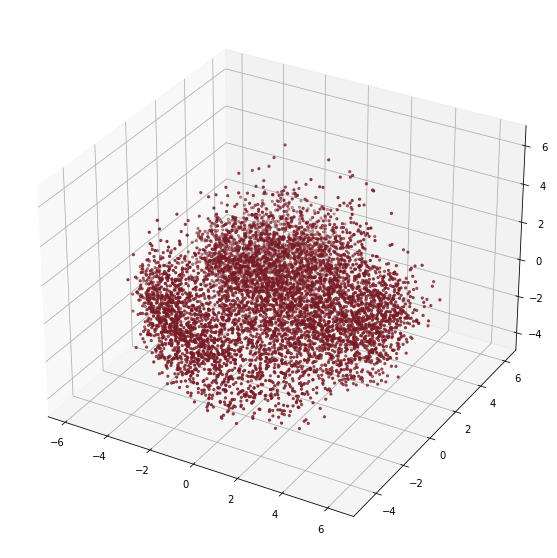

In [40]:
#Plot dataset
x = pca_ds['comp1']
y = pca_ds['comp2']
z = pca_ds['comp3']
# cmap = colors.ListedColormap(["#C1106F", "#1710C1", "#10C118", "#E08D03"])
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, marker=".", cmap=["#C1106F", "#1710C1", "#10C118", "#E08D03"])
plt.show()

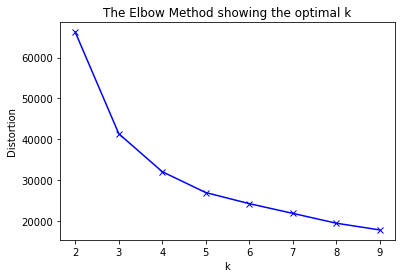

In [41]:
distortions = []
K = range(2,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_ds)
    distortions.append(kmeans.inertia_)
  
plt.figure(figsize=(6,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

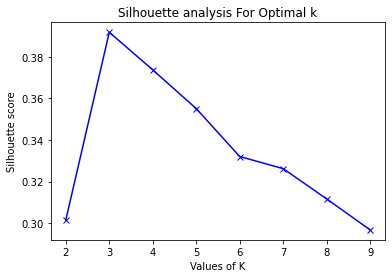

In [42]:
K = range(2,10)
silhouette_avg = []
for k in K:
 
    # initialise kmeans
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_ds)
    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg.append(silhouette_score(pca_ds, cluster_labels))
    
plt.plot(K,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

# kmeans_pca_scale = KMeans(n_clusters=4, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(pca_df_scale)
# print('KMeans PCA Scaled Silhouette Score: {}'.format(silhouette_score(pca_df_scale, kmeans_pca_scale.labels_, metric='euclidean')))
# labels_pca_scale = kmeans_pca_scale.labels_
# clusters_pca_scale = pd.concat([pca_df_scale, pd.DataFrame({'pca_clusters':labels_pca_scale})], axis=1)

In [43]:
kmeans = KMeans(n_clusters=3, init='k-means++')
y_kmeans = kmeans.fit_predict(pca_ds)
df['Cluster'] = y_kmeans
ibm_data['Cluster'] = y_kmeans
pca_ds["Cluster"] = y_kmeans

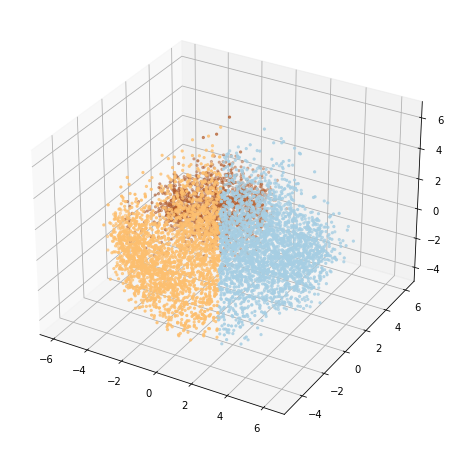

In [44]:
# Plot dataset
# cmap = colors.ListedColormap(["#C1106F", "#1710C1", "#10C118", "#E08D03"])
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, c=pca_ds["Cluster"], marker='.', cmap='Paired')
plt.show()

In [45]:
len(df.columns)

39

# Visualising Clusters

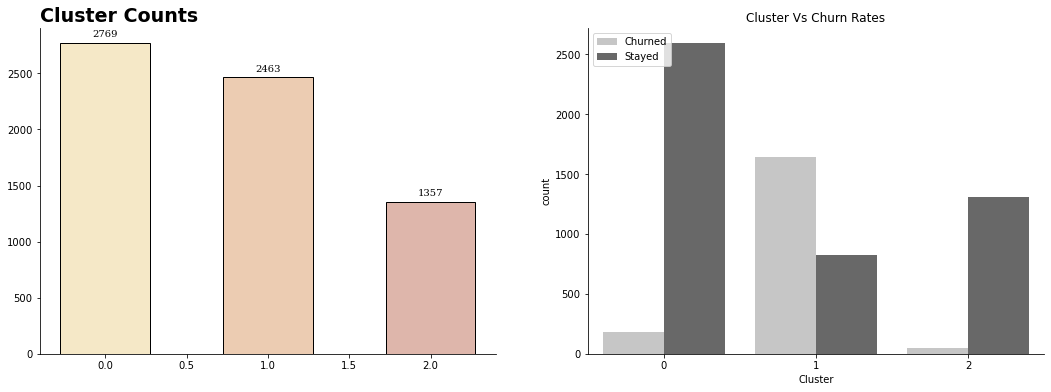

In [46]:
def plot_cluster_counts(df_cluster, ax):
    cluster_counts = df_cluster['Cluster'].value_counts().sort_index()
    ax.bar(cluster_counts.index, cluster_counts, edgecolor='black',
           color=['#F5E8C7', '#ECCCB2', '#DEB6AB', '#AC7088'], width=0.55)
    ax.set_title('Cluster Counts', loc='left', fontsize=19, fontweight='bold')
    for i, count in enumerate(cluster_counts):
        ax.annotate(f"{count}", xy=(i, count + 80), va='center', ha='center',
                    fontweight='light', fontfamily='serif', color='black')
    for s in ['top', 'right']:
        ax.spines[s].set_visible(False)

def plot_cluster_vs_churn_rates(df_cluster):
    fig, ax = plt.subplots(1, 2, figsize=(18, 6))
    plot_cluster_counts(df_cluster, ax[0])
    sns.countplot(x='Cluster', hue="Customer Status", palette="Greys", data=df_cluster, ax=ax[1])
    sns.despine()
    ax[1].legend(title='', loc='upper left')
    ax[1].set_title("Cluster Vs Churn Rates")
    plt.show()

plot_cluster_vs_churn_rates(ibm_data)

# Cluster Profiling

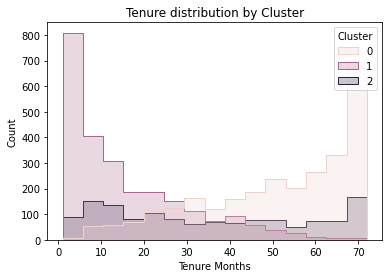

In [56]:
sns.histplot(data=df, x="Tenure Months", hue="Cluster", element="step")
plt.title('Tenure distribution by Cluster')
plt.show()

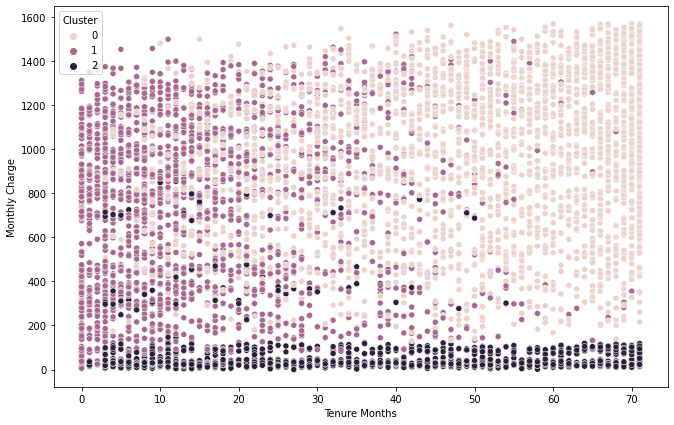

In [59]:
fig, ax = plt.subplots(figsize=(11,7))
sns.scatterplot(data=df, y="Monthly Charge", x="Tenure Months", hue="Cluster", ax=ax)
plt.show()

In [65]:
# from sklearn.preprocessing import MinMaxScaler

mean_profile = df.groupby("Cluster")[['Monthly Charge','CLTV', 'Satisfaction Score']].mean()
mean_profile

,Monthly Charge,CLTV,Satisfaction Score
Cluster,,,
0,984.947273,2036.362947,2.548935
1,726.096630,1436.246853,1.387333
2,65.390567,1750.607959,2.937362


## Type of Contracts across each segment

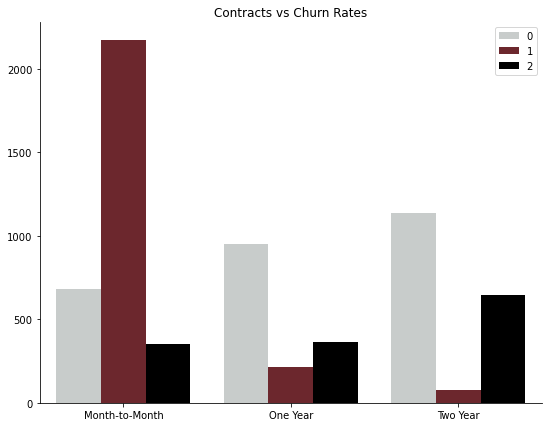

In [51]:
# Set the figure size
plt.figure(figsize=(9, 7))
colors = ["#C7CDCB", "#781B24", "#000000"]
sns.set_palette(sns.color_palette(colors))
# Create a count plot with Contract on the x-axis and Churn on the hue axis
sns.countplot(x="Contract", hue="Cluster", data=ibm_data)

# Set the plot title
plt.title('Contracts vs Churn Rates')

# Set the x and y axis labels to None
plt.xlabel(None)
plt.ylabel(None)

# Remove the top and right spines from the plot
sns.despine()

# Set the legend labels and location
plt.legend(title='', loc='upper right')

# Show the plot
plt.show()

## Type of Offers across each segment

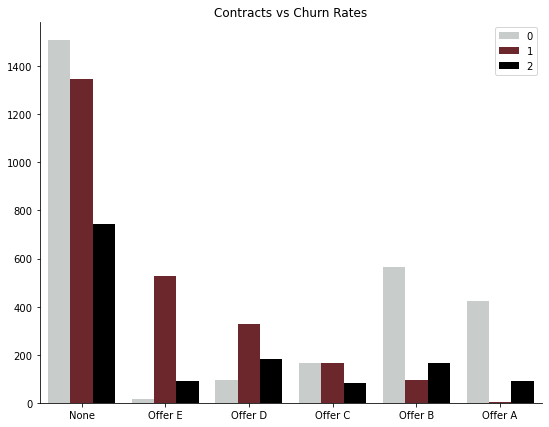

In [68]:
# Set the figure size
plt.figure(figsize=(9, 7))
colors = ["#C7CDCB", "#781B24", "#000000"]
sns.set_palette(sns.color_palette(colors))
# Create a count plot with Contract on the x-axis and Churn on the hue axis
sns.countplot(x="Offer", hue="Cluster", data=ibm_data)

# Set the plot title
plt.title('Contracts vs Churn Rates')

# Set the x and y axis labels to None
plt.xlabel(None)
plt.ylabel(None)

# Remove the top and right spines from the plot
sns.despine()

# Set the legend labels and location
plt.legend(title='', loc='upper right')

# Show the plot
plt.show()

## Demographics across each segment

Senior Citizen


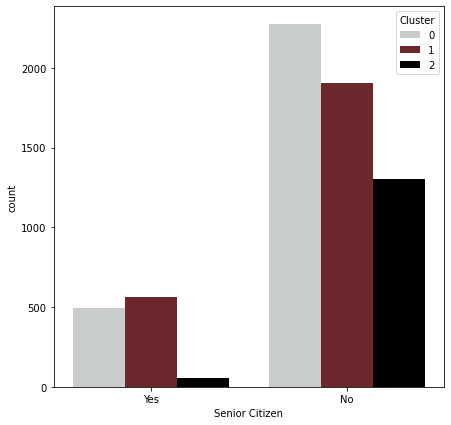

Dependents


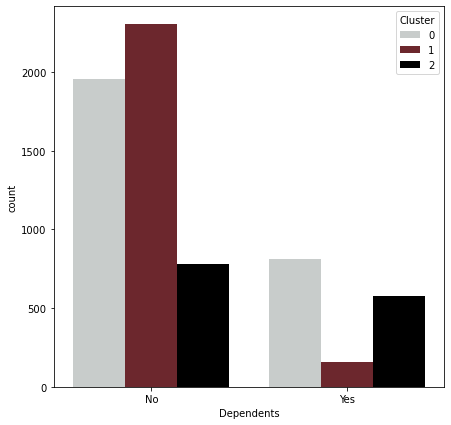

Married


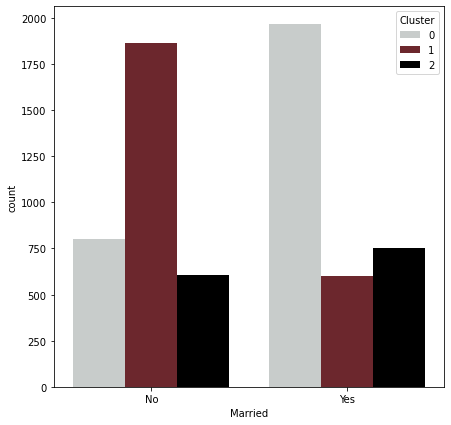

In [69]:
# Define the list of demographic features
demographic_features = ['Senior Citizen', 'Dependents', 'Married']

# Loop over the demographic features
for feature in demographic_features:
    # Print the name of the feature
    print(feature)
    
    # Create a figure and a countplot
    fig, ax = plt.subplots(figsize=(7, 7))
    sns.countplot(x=ibm_data[feature], hue=ibm_data["Cluster"], ax=ax)
    
    # Show the plot
    plt.show()

## Additional Services vs Churn

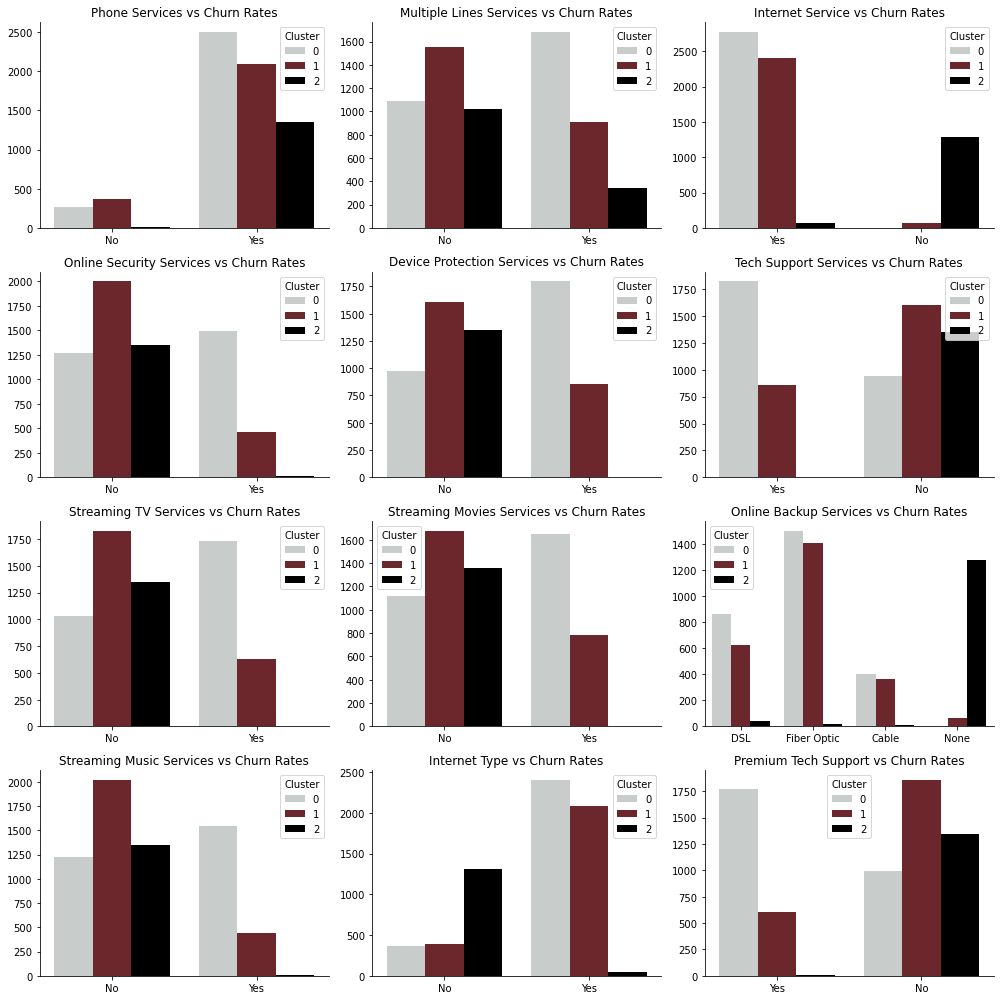

In [71]:
# Define the plot dimensions and the colors for churn and no churn customers
fig, axes = plt.subplots(nrows=4
                         , ncols=3, figsize=(14,14))
colors = ["#C7CDCB", "#781B24", "#000000"]
sns.set_palette(sns.color_palette(colors))

# Define the plot titles and axis labels
titles = ["Phone Services vs Churn Rates", "Multiple Lines Services vs Churn Rates", "Internet Service vs Churn Rates",
          "Online Security Services vs Churn Rates", "Device Protection Services vs Churn Rates",
          "Tech Support Services vs Churn Rates", "Streaming TV Services vs Churn Rates",
          "Streaming Movies Services vs Churn Rates", "Online Backup Services vs Churn Rates", "Streaming Music Services vs Churn Rates", "Internet Type vs Churn Rates", "Premium Tech Support vs Churn Rates", "Unlimited Data Service vs Churn Rates", "Device Protection Plan vs Churn Rates"]

# Define the columns to use in each subplot
columns = ["Phone Service", "Multiple Lines", "Internet Service", "Online Security", "Streaming TV", "Streaming Movies", "Online Backup","Streaming Music","Internet Type", "Premium Tech Support"
, "Unlimited Data","Device Protection Plan"]

# Plot each subplot
for i in range(len(columns)):
    sns.countplot(x=columns[i], hue="Cluster", data=ibm_data, ax=axes[i//3, i%3]).set(title=titles[i], xlabel=None, ylabel=None)

# Remove the spines from the subplots and adjust the layout
sns.despine()
plt.tight_layout()

# Show the plot
plt.show()